# Python Essentials: Data Visualization.
    Seong-Eun Cho
    Math 345
    12/11/15

In [1]:
import numpy as np
from scipy.stats import linregress,pearsonr
from scipy.special import binom
from matplotlib import rcParams, colors, pyplot as plt
from itertools import combinations

%matplotlib inline

rcParams["figure.figsize"] = (8,8)

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

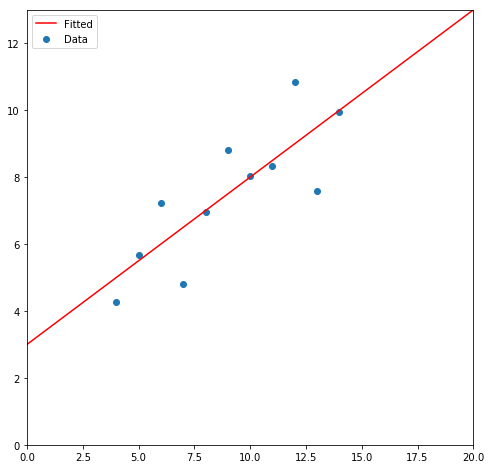

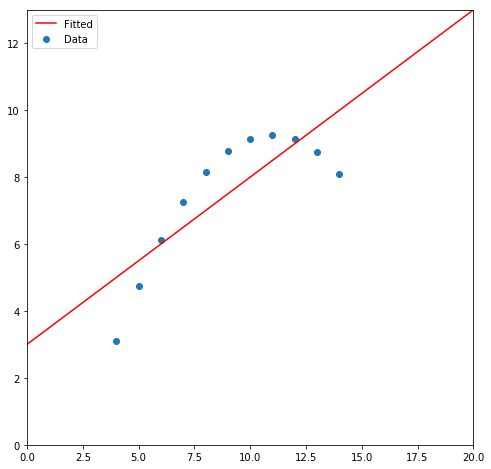

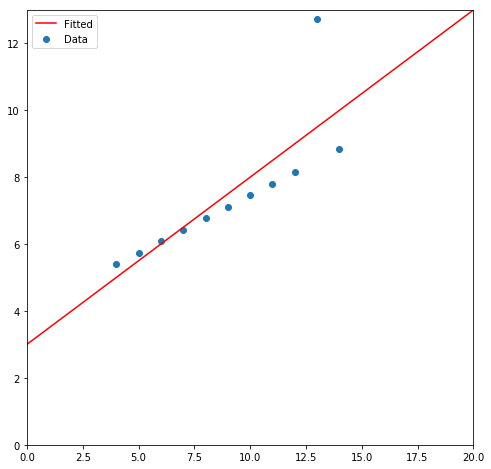

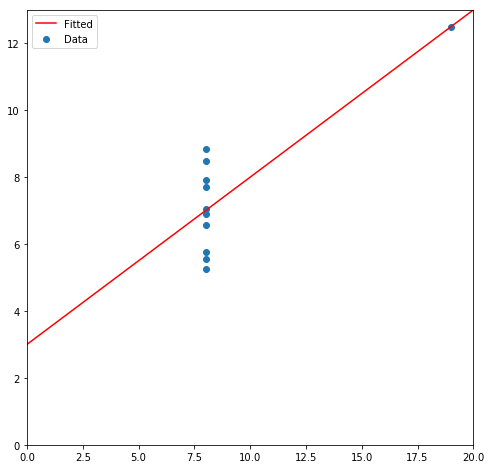

In [2]:
# Problem 1

A = np.load("anscombe.npy")
x = np.linspace(0, 20, 400)

L1 = linregress(A[:,0], A[:,1])
plt.scatter(A[:,0], A[:,1], label="Data")
plt.plot(x, L1[0]*x + L1[1], 'r', label="Fitted")
plt.xlim(0, 20)
plt.ylim(0, 13)
plt.legend()
plt.show()

L2 = linregress(A[:,2], A[:,3])
plt.scatter(A[:,2], A[:,3], label="Data")
plt.plot(x, L2[0]*x + L2[1], 'r', label="Fitted")
plt.xlim(0, 20)
plt.ylim(0, 13)
plt.legend()
plt.show()

L3 = linregress(A[:,4], A[:,5])
plt.scatter(A[:,4], A[:,5], label="Data")
plt.plot(x, L3[0]*x + L3[1], 'r', label="Fitted")
plt.xlim(0, 20)
plt.ylim(0, 13)
plt.legend()
plt.show()

L4 = linregress(A[:,6], A[:,7])
plt.scatter(A[:,6], A[:,7], label="Data")
plt.plot(x, L4[0]*x + L4[1], 'r', label="Fitted")
plt.xlim(0, 20)
plt.ylim(0, 13)
plt.legend()
plt.show()

In [3]:
for i,L in enumerate([L1,L2,L3,L4]):
    print("Section " + str(i+1) + ":")
    print("x mean: " + str(np.mean(A[:,2*i])))
    print("x variance: " + str(np.var(A[:,2*i])))
    print("y mean: " + str(np.mean(A[:,2*i+1])))
    print("y variance: " + str(np.var(A[:,2*i+1]))) 
    print("slope: " + str(L[0]))
    print("intercept: " + str(L[1]))
    print("correlation coefficient: " + str(L[2]))
    print("\n")

Section 1:
x mean: 9.0
x variance: 10.0
y mean: 7.50090909091
y variance: 3.75206280992
slope: 0.500090909091
intercept: 3.00009090909
correlation coefficient: 0.816420516345


Section 2:
x mean: 9.0
x variance: 10.0
y mean: 7.50090909091
y variance: 3.75239008264
slope: 0.5
intercept: 3.00090909091
correlation coefficient: 0.816236506


Section 3:
x mean: 9.0
x variance: 10.0
y mean: 7.5
y variance: 3.74783636364
slope: 0.499727272727
intercept: 3.00245454545
correlation coefficient: 0.81628673949


Section 4:
x mean: 9.0
x variance: 10.0
y mean: 7.50090909091
y variance: 3.74840826446
slope: 0.499909090909
intercept: 3.00172727273
correlation coefficient: 0.816521436889




Surprisingly, the mean, variance, slope, intercept, and correlation coefficient for each of the sections were exactly the same (or extremely close). It seems that each of these datas were picked so that they would regress to the exact same line. However, It is evident that each of them shows a very different characteristics, and if we were to fit them with a more suitable function, it would help to bring out their characteristics better. 

The first section resembles the result obtained from a real world sampling of a data that could be linear.
The second section seems to be data points of an already continuous quadratic function. 
The third section would be much more accurate if we were allowed to leave out outliers. It would then fit perfectly into the rest of the points.
The last section is similar to the third section. If we left out the outlier, we could fit it with x = 8 which would be a perfect fit.

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

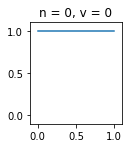

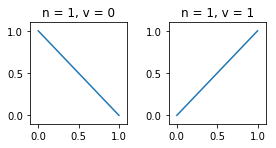

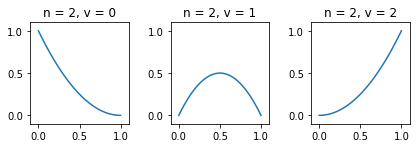

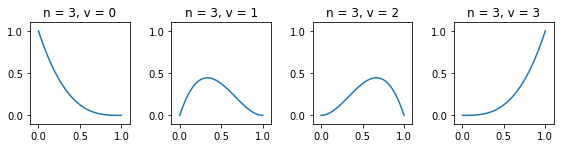

In [4]:
# Problem 2

x = np.linspace(0,1,100)
def berstein(n, v):
    return lambda x: binom(n,v)*(x**v)*(1-x)**(n-v)

for n in [0,1,2,3]:
    fig, ax = plt.subplots(1,n+1, figsize=(2*(n+1),2))
    fig.tight_layout()
    for v in range(n+1):
        b = berstein(n,v)
        if n != 0:
            ax[v].plot(x, b(x))
            ax[v].axis([-0.1, 1.1, -0.1, 1.1])
            ax[v].yaxis.set_ticks([0.0,0.5,1.0])
            ax[v].set_title("n = " + str(n) + ", v = " + str(v))
        else:
            ax.plot(x, b(x))
            ax.axis([-0.1, 1.1, -0.1, 1.1]) 
            ax.yaxis.set_ticks([0.0,0.5,1.0])
            ax.set_title("n = " + str(n) + ", v = " + str(v))

    plt.show()

### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

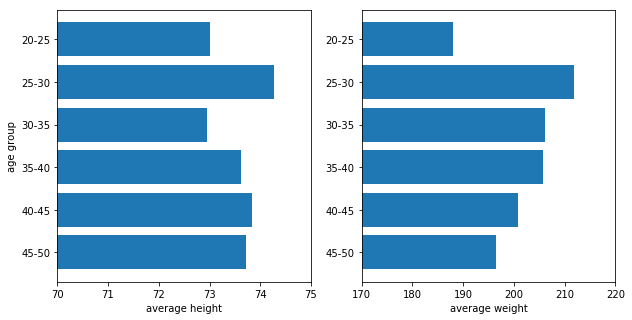

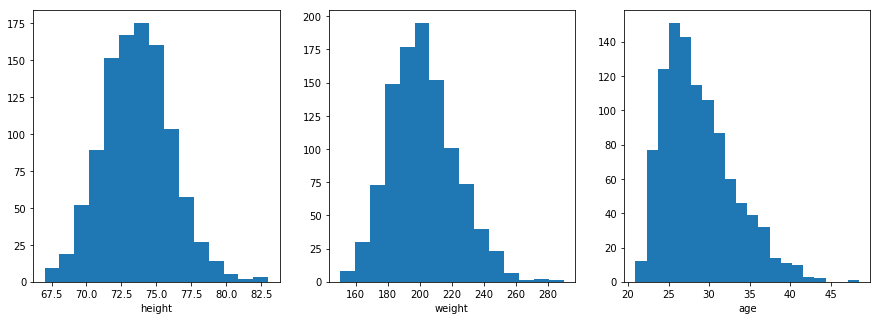

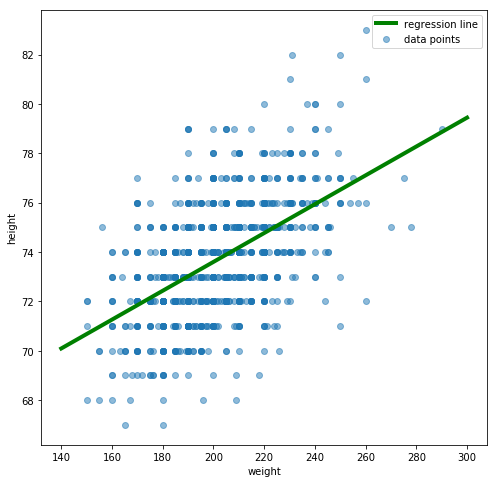

In [9]:
# Problem 3
height, weight, age = np.load("MLB.npy").T

age_group = np.arange(20,50,5)
labels = [str(i) + "-" + str(i+5) for i in age_group]
ave_height = [np.mean(height[np.intersect1d(np.where(age >= i), np.where(age < i+5))]) for i in age_group]
ave_weight = [np.mean(weight[np.intersect1d(np.where(age >= i), np.where(age < i+5))]) for i in age_group]
positions = np.arange(len(labels))

fig1, ax1 = plt.subplots(1,2, figsize=(10, 5))
ax1[0].barh(positions, ave_height, align="center")
ax1[0].set_ylabel("age group")
ax1[0].set_xlabel("average height")
ax1[0].set_yticks(positions)
ax1[0].set_yticklabels(labels[::-1])
ax1[0].set_xlim(70, 75)

ax1[1].barh(positions, ave_weight, align="center")
ax1[1].set_xlabel("average weight")
ax1[1].set_yticks(positions)
ax1[1].set_yticklabels(labels[::-1])
ax1[1].set_xlim(170, 220)
plt.show()

fig2, ax2 = plt.subplots(1,3, figsize=(15, 5))
ax2[0].hist(height, bins=15)
ax2[0].set_xlabel("height")
ax2[1].hist(weight, bins=15)
ax2[1].set_xlabel("weight")
ax2[2].hist(age, bins=20)
ax2[2].set_xlabel("age")
plt.show()

L = linregress(weight, height)
x = np.linspace(140, 300, 100)
plt.scatter(weight, height, alpha=.5, label="data points")
plt.plot(x, L[0]*x + L[1], 'g', linewidth=4.0, label="regression line")
plt.ylabel("height")
plt.xlabel("weight")
plt.legend()
plt.show()

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

In [29]:
magnitudes[np.where(magnitudes>8)]

array([ 8.1,  8.5,  8.1,  8.1,  8.3,  8.6,  9.1,  8.1,  8.3,  8.4])

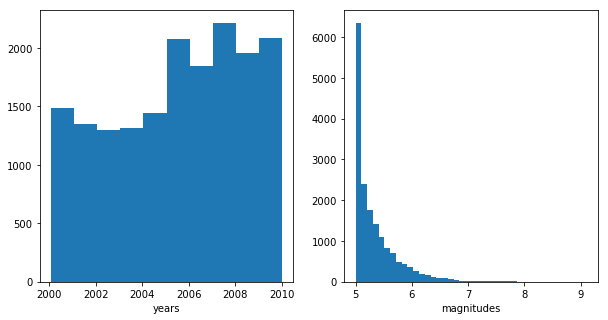

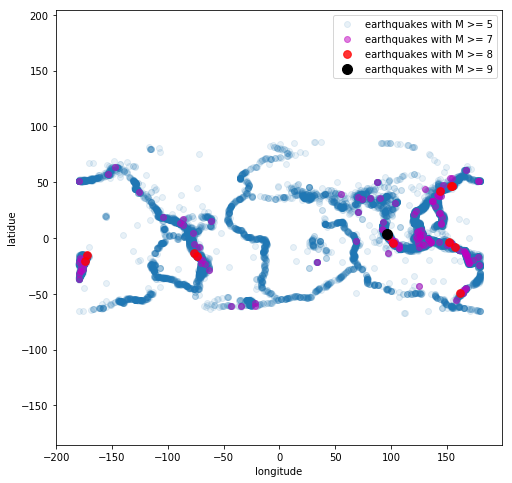

In [44]:
# Problem 4
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

fig1, ax1 = plt.subplots(1,2, figsize=(10, 5))
ax1[0].hist(years, bins=10)
ax1[0].set_xlabel("years")
ax1[1].hist(magnitudes, bins=40)
ax1[1].set_xlabel("magnitudes")
plt.show()

plt.scatter(longitude, latitude, alpha=.1, label="earthquakes with M >= 5")
plt.scatter(longitude[np.where(magnitudes>=7)], latitude[np.where(magnitudes>=7)], c='m', alpha=0.5, label="earthquakes with M >= 7")
plt.scatter(longitude[np.where(magnitudes>=8)], latitude[np.where(magnitudes>=8)], c='r', s=60, alpha=0.8, label="earthquakes with M >= 8")
plt.scatter(longitude[np.where(magnitudes>=9)], latitude[np.where(magnitudes>=9)], c='k', s=100, alpha=1.0, label="earthquakes with M >= 9")

plt.axis("equal")
plt.xlabel("longitude")
plt.ylabel("latidue")
plt.legend()
plt.show()

### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

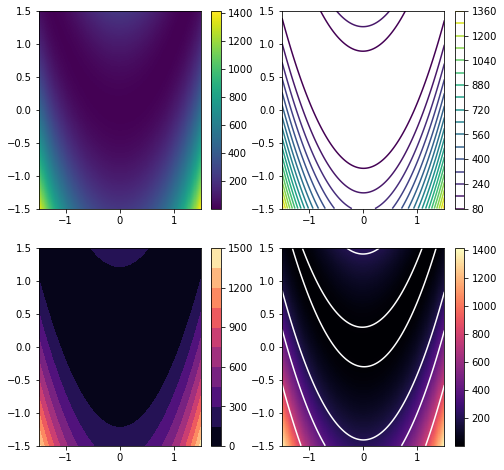

In [76]:
# Problem 5
rosen = lambda x,y: (1. - x)**2 + 100.*(y - x**2)**2

x = np.linspace(-1.5,1.5,300)
X,Y = np.meshgrid(x,x)

fig, ax = plt.subplots(2,2)
ax1=ax[0,0].pcolormesh(X, Y, rosen(X,Y), cmap="viridis")
ax2=ax[0,1].contour(X, Y, rosen(X,Y), 20, cmap="viridis")
ax3=ax[1,0].contourf(X, Y, rosen(X,Y), 12, cmap="magma")
ax4=ax[1,1].contour(X, Y, rosen(X,Y), [0,10,200,400,800], colors="white")
cax = ax[1,1].pcolormesh(X, Y, rosen(X,Y), cmap="magma")
fig.colorbar(ax1, ax=ax[0,0])
fig.colorbar(ax2, ax=ax[0,1])
fig.colorbar(ax3, ax=ax[1,0])
fig.colorbar(cax, ax=ax[1,1])

plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

In [120]:
# Problem 6
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

## Height

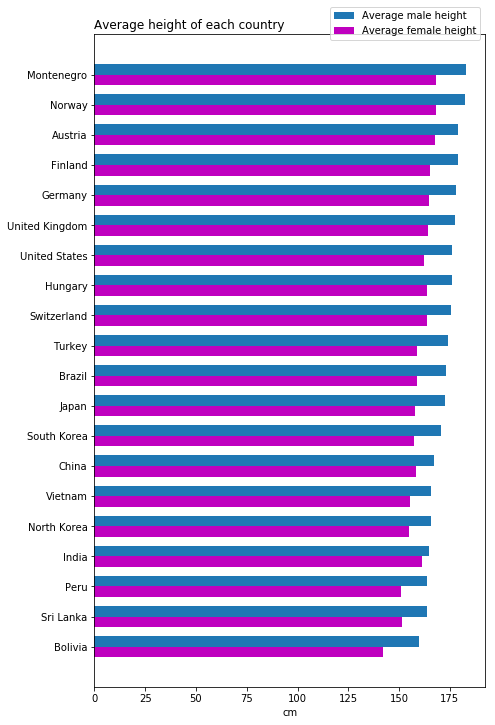

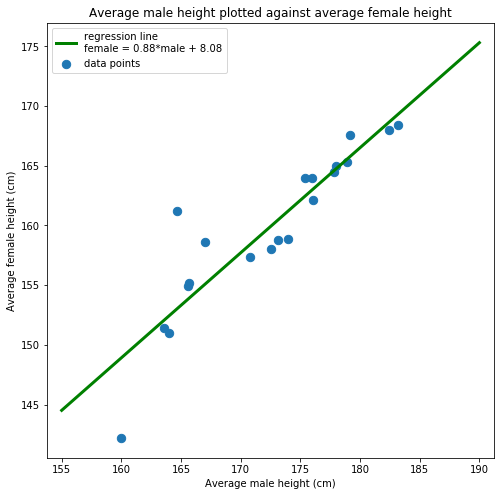

In [176]:
positions = np.arange(len(countries))
width = 0.35

plt.figure(figsize=(7,12))
plt.barh(positions+width/2, np.sort(male), width, label="Average male height")
plt.barh(positions-width/2, female[np.argsort(male)], width, color='m', label="Average female height")
plt.yticks(positions, countries[np.argsort(male)])
plt.xlabel('cm')
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.title("Average height of each country", loc="left")
plt.show()

L = linregress(male, female)
x = np.linspace(155, 190, 100)
plt.scatter(male, female, s=70, label="data points")
plt.plot(x, L[0]*x + L[1], color='g', linewidth=3, label="regression line \nfemale = " 
                                                         + str(round(L[0],3)) + "*male + " 
                                                         + str(round(L[1],3)))
plt.xlabel("Average male height (cm)")
plt.ylabel("Average female height (cm)")
plt.title("Average male height plotted against average female height")
plt.axis("equal")
plt.legend()
plt.show()

### Findings:

Montenegro has the highest average height for both males and females.

Bolivia has the lowest average height for both males and females. 

There is no country (in the data) where the average height of the females is greater than the average height of the males. India has the smallest difference between the two heights.

The correlation between the average height of male and female is close to 1 (0.88)

## GDP

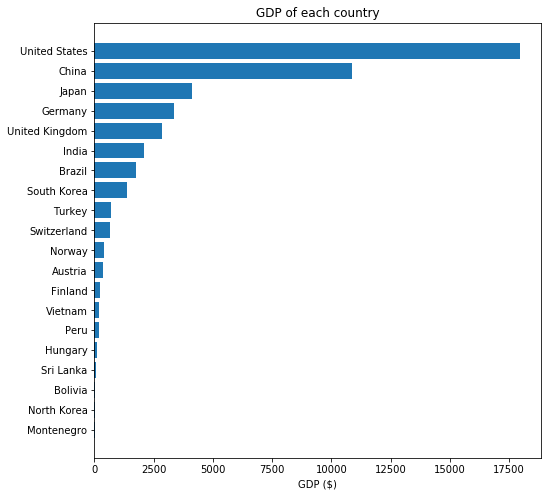

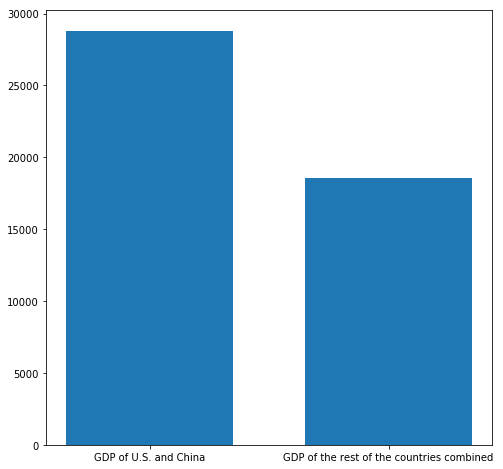

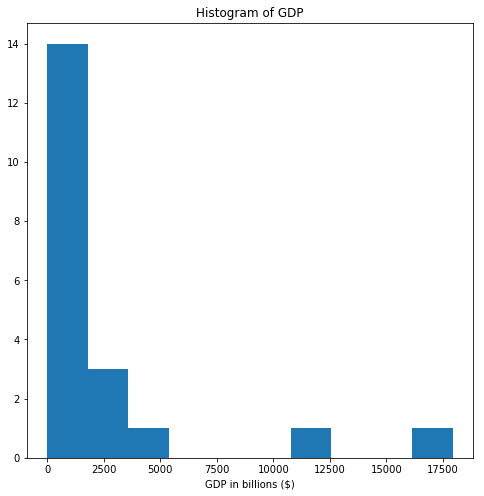

In [189]:
plt.barh(positions, np.sort(gdp))
plt.yticks(positions, countries[np.argsort(gdp)])
plt.xlabel("GDP ($)")
plt.title("GDP of each country")
plt.show()

plt.bar(np.array([0,1]), [np.sort(gdp)[-1] + np.sort(gdp)[-2], sum(np.sort(gdp)[:-2])], 0.7)
plt.xticks(np.array([0,1]), ["GDP of U.S. and China", "GDP of the rest of the countries combined"])
plt.show()

plt.hist(gdp)
plt.xlabel("GDP in billions ($)")
plt.title("Histogram of GDP")
plt.show()

### Finding:

United States has by far the largest GDP, beating out the second largest (China) by almost 2 times. 

The combined GDP of United States and China is greater than the GDP of the rest of the 18 countries combined. 

Majority of the countries had GDP of below $2500 billion

## Population

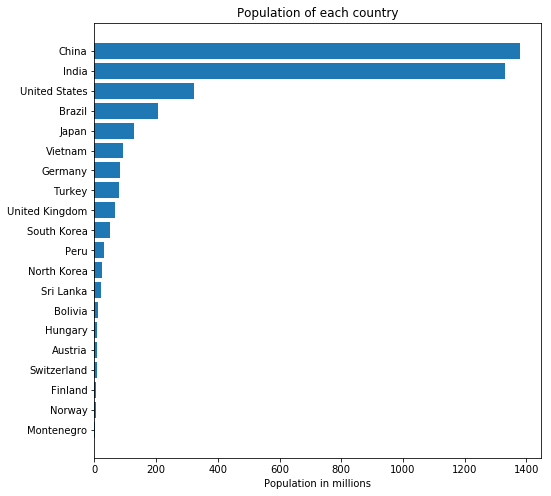

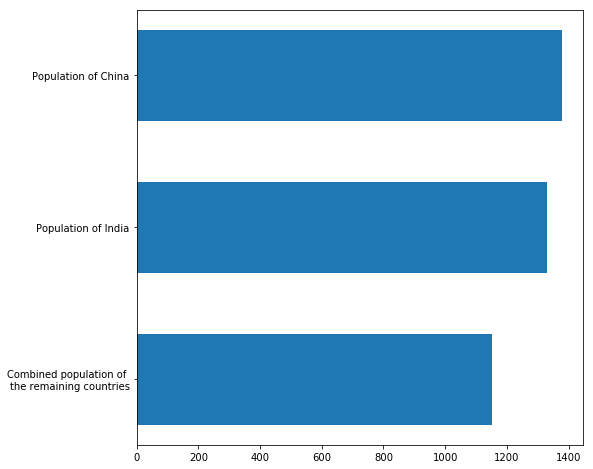

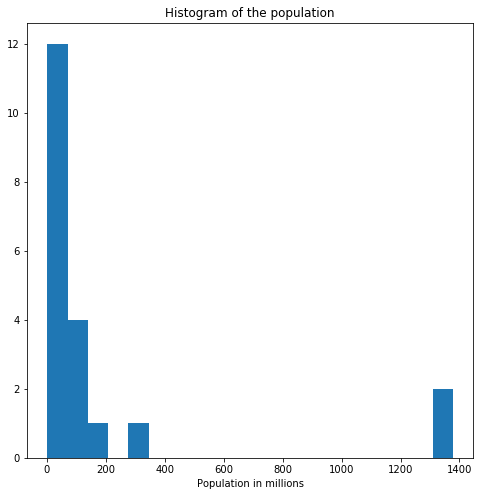

In [197]:
plt.barh(positions, np.sort(population))
plt.yticks(positions, countries[np.argsort(population)])
plt.xlabel("Population in millions")
plt.title("Population of each country")
plt.show()

plt.barh(np.array([0,1,2]), [np.sort(population)[-1], np.sort(population)[-2], sum(np.sort(population)[:-2])][::-1], 0.6)
plt.yticks(np.array([0,1,2]), ["Population of China", "Population of India", "Combined population of \nthe remaining countries"][::-1])
plt.show()

plt.hist(population, bins=20)
plt.xlabel("Population in millions")
plt.title("Histogram of the population")
plt.show()

### Findings:

China and India has by far the highest population, and between the two, the difference is very small, while the 3rd highest (United States) has a significantly lower population.

The combined population of the other 18 countries is smaller than the individual populations of China and India

Majority of the countries has below 100 million people.